In [119]:
import  pandas as pd
import recordlinkage
import re
import matplotlib.pyplot as plt


bank_df = pd.read_csv('bank_df.csv',index_col= 'index_bank')

cash_book = pd.read_csv('nav_cash_book.csv' )
cash_book = cash_book.reset_index()
cash_book = cash_book.rename(columns={'index': 'index_cashbook'})
cash_book.set_index('index_cashbook', inplace=True)
cash_book


,Unnamed: 0,posting_date,document_type,document_no,bank_account_no,description,amount,amount_lcy,open,kba_bank_code,...,entry_no,reversal_reason,description_2,subsystem_doctype,navpayingbankcategory,um_username,busledger_type_code,policy_no,ilmsreqbatchno,outstanding
index_cashbook,,,,,,,,,,,,,,,,,,,,,
0,0,2023-11-01,NaN,FPV-INS2023005697,2-740-02-002,KDN530F DENIS ODOYO,-1500000.00,-1500000.00,True,68.0,...,28533671,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,FPV-INS2023005697,False
1,1,2023-11-01,NaN,2023020025786,2-740-02-002,NIC HEAD OFFICE,-45000.00,-45000.00,True,NaN,...,28533673,NaN,NaN,PAY,USSDPOLICYLOAN,USSDPOLICYLOANUSER,INSURED,027/AEN/107082,20230200013446,False
2,2,2023-11-01,NaN,2023020025493,2-740-02-002,NIC HEAD OFFICE,-59182.20,-59182.20,True,11.0,...,28533687,NaN,NaN,PAY,NaN,SNZIOKA,INSURED,028/AEN/178027,20230200013290,False
3,3,2023-11-01,NaN,2023020025294,2-740-02-002,NIC HEAD OFFICE,-817909.94,-817909.94,True,3.0,...,28533690,NaN,NaN,PAY,NaN,SNZIOKA,INSURED,028/EAW/073607,20230200013244,False
4,4,2023-11-01,NaN,2023020025720,2-740-02-002,NIC HEAD OFFICE,-730680.88,-730680.88,True,1.0,...,28533692,NaN,NaN,PAY,NaN,SNZIOKA,INSURED,022/CEA/078232,20230200013413,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20882,20882,2023-11-30,NaN,FR-INS2023001512,2-740-02-002,DA AMOUNTS IN AC 19 ( FT233331T30Y ETC),4040520.71,4040520.71,True,NaN,...,29292347,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,NaN,False
20883,20883,2023-11-30,NaN,FR-INS2023001513,2-740-02-002,NOVEMBER INTERFUND TRANSFER,118000.00,118000.00,True,NaN,...,29292349,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,NaN,False
20884,20884,2023-11-30,NaN,FR-INS2023001515,2-740-02-002,NOVEMBER INTERFUND TRANSFER,8518859.20,8518859.20,True,NaN,...,29292375,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,NaN,False


In [120]:
bank_df_ncba = bank_df[bank_df['is_charge'] == False]
bank_df_ncba 
bank_df_ncba.columns
cash_book = cash_book.rename(columns={'index': 'index_cashbook'})
cash_book

,Unnamed: 0,posting_date,document_type,document_no,bank_account_no,description,amount,amount_lcy,open,kba_bank_code,...,entry_no,reversal_reason,description_2,subsystem_doctype,navpayingbankcategory,um_username,busledger_type_code,policy_no,ilmsreqbatchno,outstanding
index_cashbook,,,,,,,,,,,,,,,,,,,,,
0,0,2023-11-01,NaN,FPV-INS2023005697,2-740-02-002,KDN530F DENIS ODOYO,-1500000.00,-1500000.00,True,68.0,...,28533671,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,FPV-INS2023005697,False
1,1,2023-11-01,NaN,2023020025786,2-740-02-002,NIC HEAD OFFICE,-45000.00,-45000.00,True,NaN,...,28533673,NaN,NaN,PAY,USSDPOLICYLOAN,USSDPOLICYLOANUSER,INSURED,027/AEN/107082,20230200013446,False
2,2,2023-11-01,NaN,2023020025493,2-740-02-002,NIC HEAD OFFICE,-59182.20,-59182.20,True,11.0,...,28533687,NaN,NaN,PAY,NaN,SNZIOKA,INSURED,028/AEN/178027,20230200013290,False
3,3,2023-11-01,NaN,2023020025294,2-740-02-002,NIC HEAD OFFICE,-817909.94,-817909.94,True,3.0,...,28533690,NaN,NaN,PAY,NaN,SNZIOKA,INSURED,028/EAW/073607,20230200013244,False
4,4,2023-11-01,NaN,2023020025720,2-740-02-002,NIC HEAD OFFICE,-730680.88,-730680.88,True,1.0,...,28533692,NaN,NaN,PAY,NaN,SNZIOKA,INSURED,022/CEA/078232,20230200013413,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20882,20882,2023-11-30,NaN,FR-INS2023001512,2-740-02-002,DA AMOUNTS IN AC 19 ( FT233331T30Y ETC),4040520.71,4040520.71,True,NaN,...,29292347,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,NaN,False
20883,20883,2023-11-30,NaN,FR-INS2023001513,2-740-02-002,NOVEMBER INTERFUND TRANSFER,118000.00,118000.00,True,NaN,...,29292349,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,NaN,False
20884,20884,2023-11-30,NaN,FR-INS2023001515,2-740-02-002,NOVEMBER INTERFUND TRANSFER,8518859.20,8518859.20,True,NaN,...,29292375,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,NaN,False


In [121]:
# Create the new column 'trx_id' by combining the values from the specified columns
bank_df_ncba.loc[:, 'trx_id'] = bank_df_ncba[['ft_no', 'tt_no', 'aaa_no', 'md_no', 'cheque_no', 'batch_no']].bfill(axis=1).iloc[:, 0]

bank_df_ncba


/tmp/ipykernel_67367/1767320100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df_ncba.loc[:, 'trx_id'] = bank_df_ncba[['ft_no', 'tt_no', 'aaa_no', 'md_no', 'cheque_no', 'batch_no']].bfill(axis=1).iloc[:, 0]


,Unnamed: 0,date,transaction_details_1,transaction_details_2,amount,trx_type,trans_type,trx_detail,period,ft_no,tt_no,aaa_no,md_no,charge_id,batch_no,inhouse_cheque_no,cheque_no,bulk_trans_id,is_charge,trx_id
index_bank,,,,,,,,,,,,,,,,,,,,
0,0,2023-11-01,Standing Order FT233054RNZQ,POLICY PREMIUM 029/VES/155738 EUNICE KAMBA MBU...,2206.00,credit,Standing Order,Standing Order FT233054RNZQ POLICY PREMIUM 029...,2023Q4,FT233054RNZQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT233054RNZQ
1,1,2023-11-01,Standing Order FT23305LCPC5,093715/093716/143362/171223 MARTIN KIMANI KANG...,8020.00,credit,Standing Order,Standing Order FT23305LCPC5 093715/093716/1433...,2023Q4,FT23305LCPC5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT23305LCPC5
2,2,2023-11-01,Standing Order FT23305RQKBY,JK Policy no. 027/EAW/232465 JANE JEMATIA KIPL...,64000.00,credit,Standing Order,Standing Order FT23305RQKBY JK Policy no. 027/...,2023Q4,FT23305RQKBY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT23305RQKBY
3,3,2023-11-01,Standing Order FT23305K8ZVX,025/NCBAEDU/267594 PURITY GAKII,10025.00,credit,Standing Order,Standing Order FT23305K8ZVX 025/NCBAEDU/267594...,2023Q4,FT23305K8ZVX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT23305K8ZVX
4,4,2023-11-01,Standing Order FT2330502XLT,POLICY NO: 029/EAW/208751 INVESTMENT POLICY MA...,2005.00,credit,Standing Order,Standing Order FT2330502XLT POLICY NO: 029/EAW...,2023Q4,FT2330502XLT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT2330502XLT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,3165,2023-11-30,Internal Transfer FT23334XKMS5,DIRECT DEBIT POLICY 027/EAW/264613 JENNIFER KA...,16529.00,credit,Internal Transfer,Internal Transfer FT23334XKMS5 DIRECT DEBIT PO...,2023Q4,FT23334XKMS5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT23334XKMS5
3166,3166,2023-11-30,Local Cheque Deposit,CHQ-000548 ROY FT233342CX8X,35000.00,credit,Local Cheque Deposit,Local Cheque Deposit CHQ-000548 ROY FT233342CX8X,2023Q4,FT233342CX8X,NaN,NaN,NaN,NaN,NaN,NaN,548.0,NaN,False,FT233342CX8X
3167,3167,2023-11-30,Local Cheque Deposit,CHQ-000336 REBECCA FT233343SV7C,14117.00,credit,Local Cheque Deposit,Local Cheque Deposit CHQ-000336 REBECCA FT2333...,2023Q4,FT233343SV7C,NaN,NaN,NaN,NaN,NaN,NaN,336.0,NaN,False,FT233343SV7C


In [122]:
# BANK TO CASHBOOK
indexer = recordlinkage.Index()

#indexer.full()
indexer.block(left_on="date",right_on="posting_date")
indexer_cash_book = recordlinkage.Index()
indexer_cash_book.block(left_on="posting_date",right_on="date")
indexer_bank = recordlinkage.Index()


In [123]:
cash_book
#bank_df_ncba

,Unnamed: 0,posting_date,document_type,document_no,bank_account_no,description,amount,amount_lcy,open,kba_bank_code,...,entry_no,reversal_reason,description_2,subsystem_doctype,navpayingbankcategory,um_username,busledger_type_code,policy_no,ilmsreqbatchno,outstanding
index_cashbook,,,,,,,,,,,,,,,,,,,,,
0,0,2023-11-01,NaN,FPV-INS2023005697,2-740-02-002,KDN530F DENIS ODOYO,-1500000.00,-1500000.00,True,68.0,...,28533671,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,FPV-INS2023005697,False
1,1,2023-11-01,NaN,2023020025786,2-740-02-002,NIC HEAD OFFICE,-45000.00,-45000.00,True,NaN,...,28533673,NaN,NaN,PAY,USSDPOLICYLOAN,USSDPOLICYLOANUSER,INSURED,027/AEN/107082,20230200013446,False
2,2,2023-11-01,NaN,2023020025493,2-740-02-002,NIC HEAD OFFICE,-59182.20,-59182.20,True,11.0,...,28533687,NaN,NaN,PAY,NaN,SNZIOKA,INSURED,028/AEN/178027,20230200013290,False
3,3,2023-11-01,NaN,2023020025294,2-740-02-002,NIC HEAD OFFICE,-817909.94,-817909.94,True,3.0,...,28533690,NaN,NaN,PAY,NaN,SNZIOKA,INSURED,028/EAW/073607,20230200013244,False
4,4,2023-11-01,NaN,2023020025720,2-740-02-002,NIC HEAD OFFICE,-730680.88,-730680.88,True,1.0,...,28533692,NaN,NaN,PAY,NaN,SNZIOKA,INSURED,022/CEA/078232,20230200013413,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20882,20882,2023-11-30,NaN,FR-INS2023001512,2-740-02-002,DA AMOUNTS IN AC 19 ( FT233331T30Y ETC),4040520.71,4040520.71,True,NaN,...,29292347,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,NaN,False
20883,20883,2023-11-30,NaN,FR-INS2023001513,2-740-02-002,NOVEMBER INTERFUND TRANSFER,118000.00,118000.00,True,NaN,...,29292349,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,NaN,False
20884,20884,2023-11-30,NaN,FR-INS2023001515,2-740-02-002,NOVEMBER INTERFUND TRANSFER,8518859.20,8518859.20,True,NaN,...,29292375,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,NaN,False


In [124]:
# CANDIDATES FOR BANK AND CASHBOOK
candidates_bank = indexer.index(bank_df_ncba,cash_book)
candidates_cashbook = indexer_cash_book.index(cash_book,bank_df_ncba)

len(candidates_bank)
len(candidates_cashbook)


2131560

In [125]:
# initialize Compare classes

compare_bank = recordlinkage.Compare()
compare_cashbook = recordlinkage.Compare()

bank_df_ncba = bank_df_ncba.rename(columns={'amount':'amount_bank'})
cash_book=cash_book.rename(columns={'amount':'amount_cashbook'})


compare_bank.string("amount_bank","amount_cashbook" ,label = 'amount')
compare_bank.string("trx_id","eft_file_name", label = 'transaction_id')


compare_cashbook.string("amount_cashbook","amount_bank" ,label = 'amount')
compare_cashbook.string("eft_file_name","trx_id", label = 'transaction_id')



<Compare>

In [126]:
cash_book
bank_df_ncba

,Unnamed: 0,date,transaction_details_1,transaction_details_2,amount_bank,trx_type,trans_type,trx_detail,period,ft_no,tt_no,aaa_no,md_no,charge_id,batch_no,inhouse_cheque_no,cheque_no,bulk_trans_id,is_charge,trx_id
index_bank,,,,,,,,,,,,,,,,,,,,
0,0,2023-11-01,Standing Order FT233054RNZQ,POLICY PREMIUM 029/VES/155738 EUNICE KAMBA MBU...,2206.00,credit,Standing Order,Standing Order FT233054RNZQ POLICY PREMIUM 029...,2023Q4,FT233054RNZQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT233054RNZQ
1,1,2023-11-01,Standing Order FT23305LCPC5,093715/093716/143362/171223 MARTIN KIMANI KANG...,8020.00,credit,Standing Order,Standing Order FT23305LCPC5 093715/093716/1433...,2023Q4,FT23305LCPC5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT23305LCPC5
2,2,2023-11-01,Standing Order FT23305RQKBY,JK Policy no. 027/EAW/232465 JANE JEMATIA KIPL...,64000.00,credit,Standing Order,Standing Order FT23305RQKBY JK Policy no. 027/...,2023Q4,FT23305RQKBY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT23305RQKBY
3,3,2023-11-01,Standing Order FT23305K8ZVX,025/NCBAEDU/267594 PURITY GAKII,10025.00,credit,Standing Order,Standing Order FT23305K8ZVX 025/NCBAEDU/267594...,2023Q4,FT23305K8ZVX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT23305K8ZVX
4,4,2023-11-01,Standing Order FT2330502XLT,POLICY NO: 029/EAW/208751 INVESTMENT POLICY MA...,2005.00,credit,Standing Order,Standing Order FT2330502XLT POLICY NO: 029/EAW...,2023Q4,FT2330502XLT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT2330502XLT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,3165,2023-11-30,Internal Transfer FT23334XKMS5,DIRECT DEBIT POLICY 027/EAW/264613 JENNIFER KA...,16529.00,credit,Internal Transfer,Internal Transfer FT23334XKMS5 DIRECT DEBIT PO...,2023Q4,FT23334XKMS5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT23334XKMS5
3166,3166,2023-11-30,Local Cheque Deposit,CHQ-000548 ROY FT233342CX8X,35000.00,credit,Local Cheque Deposit,Local Cheque Deposit CHQ-000548 ROY FT233342CX8X,2023Q4,FT233342CX8X,NaN,NaN,NaN,NaN,NaN,NaN,548.0,NaN,False,FT233342CX8X
3167,3167,2023-11-30,Local Cheque Deposit,CHQ-000336 REBECCA FT233343SV7C,14117.00,credit,Local Cheque Deposit,Local Cheque Deposit CHQ-000336 REBECCA FT2333...,2023Q4,FT233343SV7C,NaN,NaN,NaN,NaN,NaN,NaN,336.0,NaN,False,FT233343SV7C



left_on=["date", "amount", "trx_id"]
right_on=["posting_date", "amount", "eft_file_name"]
matched_results = fuzzymatcher.fuzzy_left_join(bank_df_ncba, cash_book, left_on = left_on, right_on = right_on, left_id_col="index_bank", right_id_col="index_cashbook")

       


In [127]:
bank_df_ncba

,Unnamed: 0,date,transaction_details_1,transaction_details_2,amount_bank,trx_type,trans_type,trx_detail,period,ft_no,tt_no,aaa_no,md_no,charge_id,batch_no,inhouse_cheque_no,cheque_no,bulk_trans_id,is_charge,trx_id
index_bank,,,,,,,,,,,,,,,,,,,,
0,0,2023-11-01,Standing Order FT233054RNZQ,POLICY PREMIUM 029/VES/155738 EUNICE KAMBA MBU...,2206.00,credit,Standing Order,Standing Order FT233054RNZQ POLICY PREMIUM 029...,2023Q4,FT233054RNZQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT233054RNZQ
1,1,2023-11-01,Standing Order FT23305LCPC5,093715/093716/143362/171223 MARTIN KIMANI KANG...,8020.00,credit,Standing Order,Standing Order FT23305LCPC5 093715/093716/1433...,2023Q4,FT23305LCPC5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT23305LCPC5
2,2,2023-11-01,Standing Order FT23305RQKBY,JK Policy no. 027/EAW/232465 JANE JEMATIA KIPL...,64000.00,credit,Standing Order,Standing Order FT23305RQKBY JK Policy no. 027/...,2023Q4,FT23305RQKBY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT23305RQKBY
3,3,2023-11-01,Standing Order FT23305K8ZVX,025/NCBAEDU/267594 PURITY GAKII,10025.00,credit,Standing Order,Standing Order FT23305K8ZVX 025/NCBAEDU/267594...,2023Q4,FT23305K8ZVX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT23305K8ZVX
4,4,2023-11-01,Standing Order FT2330502XLT,POLICY NO: 029/EAW/208751 INVESTMENT POLICY MA...,2005.00,credit,Standing Order,Standing Order FT2330502XLT POLICY NO: 029/EAW...,2023Q4,FT2330502XLT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT2330502XLT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,3165,2023-11-30,Internal Transfer FT23334XKMS5,DIRECT DEBIT POLICY 027/EAW/264613 JENNIFER KA...,16529.00,credit,Internal Transfer,Internal Transfer FT23334XKMS5 DIRECT DEBIT PO...,2023Q4,FT23334XKMS5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT23334XKMS5
3166,3166,2023-11-30,Local Cheque Deposit,CHQ-000548 ROY FT233342CX8X,35000.00,credit,Local Cheque Deposit,Local Cheque Deposit CHQ-000548 ROY FT233342CX8X,2023Q4,FT233342CX8X,NaN,NaN,NaN,NaN,NaN,NaN,548.0,NaN,False,FT233342CX8X
3167,3167,2023-11-30,Local Cheque Deposit,CHQ-000336 REBECCA FT233343SV7C,14117.00,credit,Local Cheque Deposit,Local Cheque Deposit CHQ-000336 REBECCA FT2333...,2023Q4,FT233343SV7C,NaN,NaN,NaN,NaN,NaN,NaN,336.0,NaN,False,FT233343SV7C


In [128]:

# Ensure that the relevant columns are converted to strings
bank_df_ncba['amount_bank'] = bank_df_ncba['amount_bank'].astype(str)
cash_book['amount_cashbook'] = cash_book['amount_cashbook'].astype(str)
bank_df_ncba['trx_id'] = bank_df_ncba['trx_id'].astype(str)
cash_book['eft_file_name'] = cash_book['eft_file_name'].astype(str)

features_bank = compare_bank.compute(candidates_bank, bank_df_ncba, cash_book)

features_bank['sum']= features_bank['amount'] + features_bank['transaction_id']

In [129]:
features_bank

amount  transaction_id       sum
index_bank index_cashbook                                    
0          0               0.300000        0.133333  0.433333
           1               0.375000        0.083333  0.458333
           2               0.125000        0.133333  0.258333
           3               0.200000        0.133333  0.333333
           4               0.300000        0.133333  0.433333
...                             ...             ...       ...
3171       20882           0.200000        0.388889  0.588889
           20883           0.000000        0.277778  0.277778
           20884           0.111111        0.277778  0.388889
           20885           0.400000        0.166667  0.566667
           20886           0.375000        0.166667  0.541667

[2131560 rows x 3 columns]

In [130]:

features_cashbook = compare_cashbook.compute(candidates_cashbook,cash_book,bank_df_ncba)

features_cashbook['sum']=features_cashbook['amount'] + features_cashbook['transaction_id']
features_cashbook

amount  transaction_id       sum
index_cashbook index_bank                                  
0              0            0.300        0.133333  0.433333
               1            0.400        0.133333  0.533333
               2            0.500        0.133333  0.633333
               3            0.500        0.133333  0.633333
               4            0.400        0.200000  0.600000
...                           ...             ...       ...
20886          3165         0.375        0.133333  0.508333
               3166         0.375        0.133333  0.508333
               3167         0.500        0.133333  0.633333
               3168         0.375        0.133333  0.508333
               3171         0.375        0.166667  0.541667

[2131560 rows x 3 columns]

In [132]:

best_match_cashbook = features_cashbook.loc[features_cashbook.groupby('index_cashbook')['sum'].idxmax()]
best_match_cashbook

,,amount,transaction_id,sum
index_cashbook,index_bank,,,
0,84,0.800000,0.266667,1.066667
1,135,0.875000,0.083333,0.958333
2,65,0.500000,0.266667,0.766667
3,36,0.400000,0.200000,0.600000
4,109,0.500000,0.200000,0.700000
...,...,...,...,...
20882,3049,1.000000,1.000000,2.000000
20883,3153,0.750000,0.500000,1.250000
20884,3044,0.444444,0.416667,0.861111


In [133]:
threshold = 1.5

best_match_cashbook['rl_matched'] = best_match_cashbook['sum'] > threshold
best_match_cashbook


,,amount,transaction_id,sum,rl_matched
index_cashbook,index_bank,,,,
0,84,0.800000,0.266667,1.066667,False
1,135,0.875000,0.083333,0.958333,False
2,65,0.500000,0.266667,0.766667,False
3,36,0.400000,0.200000,0.600000,False
4,109,0.500000,0.200000,0.700000,False
...,...,...,...,...,...
20882,3049,1.000000,1.000000,2.000000,True
20883,3153,0.750000,0.500000,1.250000,False
20884,3044,0.444444,0.416667,0.861111,False


In [67]:
best_match_bank = features_bank.loc[features_bank.groupby('index_bank')['sum'].idxmax()]
best_match_bank

,,amount,transaction_id,sum
index_bank,,,,
0,159,1.000000,1.000000,2.000000
1,151,0.500000,1.000000,1.500000
2,150,1.000000,1.000000,2.000000
3,162,1.000000,1.000000,2.000000
4,160,1.000000,1.000000,2.000000
...,...,...,...,...
3165,20838,0.750000,0.583333,1.333333
3166,20292,0.857143,0.583333,1.440476
3167,20691,0.571429,0.666667,1.238095


In [73]:
threshold = 1.5

best_match_bank['rl_matched'] = best_match_bank['sum'] > threshold
best_match_bank


,,amount,transaction_id,sum,rl_matched
index_bank,,,,,
0,159,1.000000,1.000000,2.000000,True
1,151,0.500000,1.000000,1.500000,False
2,150,1.000000,1.000000,2.000000,True
3,162,1.000000,1.000000,2.000000,True
4,160,1.000000,1.000000,2.000000,True
...,...,...,...,...,...
3165,20838,0.750000,0.583333,1.333333,False
3166,20292,0.857143,0.583333,1.440476,False
3167,20691,0.571429,0.666667,1.238095,False


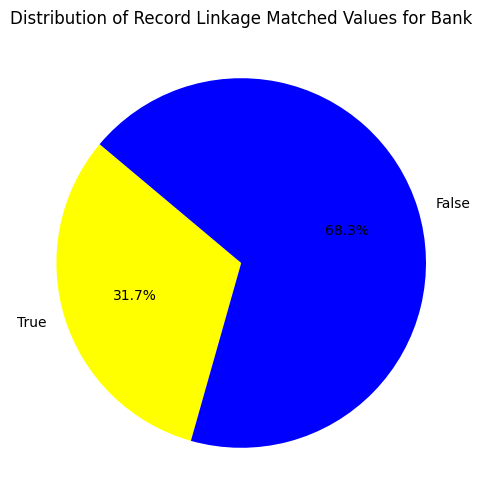

In [75]:
# Count the number of TRUE and FALSE values in the 'fuzzy_matched' column
rl_matched_counts = best_match_bank['rl_matched'].value_counts()

# Define the labels and sizes for the pie chart
labels = [True, False]
sizes = [rl_matched_counts[True], rl_matched_counts[False]]
colors = ['yellow', 'blue']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Record Linkage Matched Values for Bank')
plt.show()


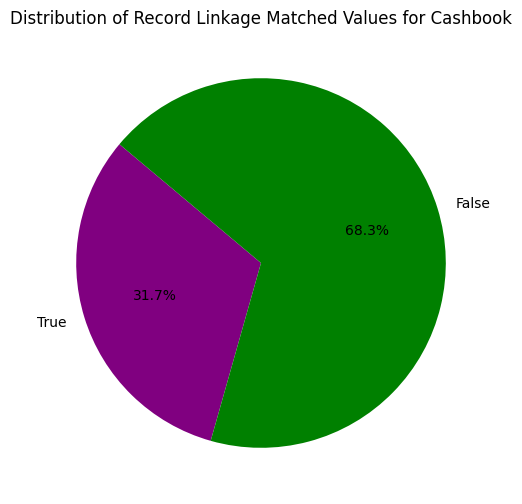

In [135]:
# Count the number of TRUE and FALSE values in the 'fuzzy_matched' column
rl_matched_counts_cashbook = best_match_cashbook['rl_matched'].value_counts()

# Define the labels and sizes for the pie chart
labels = [True, False]
sizes = [rl_matched_counts[True], rl_matched_counts[False]]
colors = ['Purple', 'green']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Record Linkage Matched Values for Cashbook')
plt.show()
